In [68]:
#portfolio optimization

In [2]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
%matplotlib inline

In [69]:
stocks =['ASHOKLEY.NS','ASIANPAINT.NS','DMART.NS','HDFCBANK.NS']
new_data = pd.DataFrame()
for t in stocks:
    new_data[t] = wb.DataReader(t, data_source='yahoo', start='2018-01-01')['Adj Close']
new_data.head()

,ASHOKLEY.NS,ASIANPAINT.NS,DMART.NS,HDFCBANK.NS
Date,,,,
2018-01-01,104.483192,1121.861816,1170.500000,913.640503
2018-01-02,108.622009,1120.978882,1160.000000,922.434570
2018-01-03,109.634697,1120.145020,1184.550049,912.729065
2018-01-04,111.792160,1149.720703,1203.099976,916.300903
2018-01-05,112.232460,1162.669189,1243.400024,918.123779


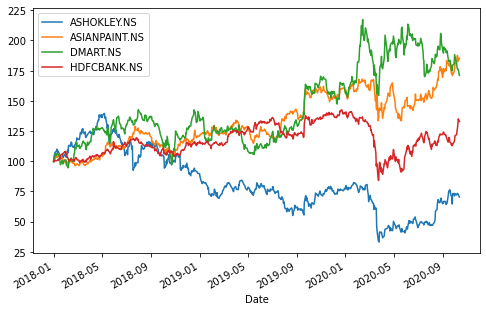

In [70]:
# normalization
(new_data/new_data.iloc[0]*100).plot(figsize=(8,5))
plt.show()

In [71]:
log_returns=np.log(new_data/new_data.shift(1))

In [72]:
log_returns.mean() * 250

ASHOKLEY.NS     -0.129436
ASIANPAINT.NS    0.225933
DMART.NS         0.196853
HDFCBANK.NS      0.104087
dtype: float64

In [73]:
log_returns.cov() * 250

,ASHOKLEY.NS,ASIANPAINT.NS,DMART.NS,HDFCBANK.NS
ASHOKLEY.NS,0.270668,0.038787,0.060717,0.050635
ASIANPAINT.NS,0.038787,0.075978,0.031226,0.033529
DMART.NS,0.060717,0.031226,0.123288,0.033112
HDFCBANK.NS,0.050635,0.033529,0.033112,0.079183


In [74]:
log_returns.corr()

,ASHOKLEY.NS,ASIANPAINT.NS,DMART.NS,HDFCBANK.NS
ASHOKLEY.NS,1.000000,0.270476,0.332378,0.345871
ASIANPAINT.NS,0.270476,1.000000,0.322634,0.432273
DMART.NS,0.332378,0.322634,1.000000,0.335127
HDFCBANK.NS,0.345871,0.432273,0.335127,1.000000


In [75]:
num_stocks= len(stocks)

In [76]:
# random assingmnmnet of weights (sum of weights always equal to 1)
#weights= np.random.random(num_stocks)
#weights /= np.sum(weights)


#expected portfolio return
#np.sum(weights * log_returns.mean() * 250)

#expected portfolio variance
#np.dot(weights.T, np.dot(log_returns.cov() * 250, weights))

#expected portfolio volatility
#np.sqrt(np.dot(weights.T, np.dot(log_returns.cov() * 250, weights)))

In [77]:
pfolio_returns = []
pfolio_volatilities = []
for x in range (1000):                        
    weights = np.random.random(num_stocks)               #assigning random weights for optimum portfolio
    weights /= np.sum(weights)
    pfolio_returns.append(np.sum(weights * log_returns.mean()) * 250)
    pfolio_volatilities.append(np.sqrt(np.dot(weights.T, np.dot(log_returns.cov() * 250, weights))))


In [78]:
pfolio_returns = np.array(pfolio_returns)
pfolio_volatilities=np.array(pfolio_volatilities)


In [79]:
portfolios = pd.DataFrame({'Returns':pfolio_returns, 'Volatility': pfolio_volatilities})
portfolios.head()

,Returns,Volatility
0,-0.000825,0.333434
1,0.150557,0.227270
2,0.146618,0.237217
3,0.091132,0.277709
4,0.087224,0.278347


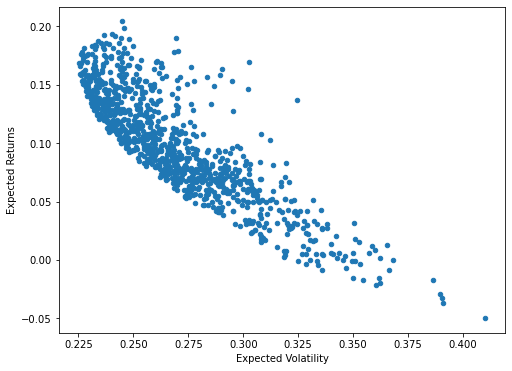

In [80]:
portfolios.plot(x='Volatility', y='Returns', kind= 'scatter', figsize=(8,6))
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Returns')
plt.show()